# Networkx Analysis of Yonda Competitors

In [1]:
#!/usr/bin/env python

# import libraries
import pandas as pd
import networkx as nx
from random import randint as rand
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
data_path_1 = '../data/processed/TandemMoney.gml'
data_path_2 = '../data/processed/BuyWithBread.gml'
data_path_3 = '../data/processed/icount_money.gml'

In [15]:
# read in gml
graph_1 = nx.read_gml(data_path_1)
graph_2 = nx.read_gml(data_path_2)
graph_3 = nx.read_gml(data_path_3)

In [13]:
def network_stats(graph):
    """
    Network stats for graph
    """
    # betweeness centrality
    bc = nx.betweenness_centrality(graph)
    print('Betweeness Crentrality: \n')
    print(sorted(bc, key=bc.get, reverse=True)[:20])
    nx.set_node_attributes(graph, name='bc', values=bc)

    # degree centrality
    dc = nx.degree_centrality(graph)
    print('Degree Crentrality: \n')
    print(sorted(dc, key=dc.get, reverse=True)[:20])
    nx.set_node_attributes(graph, name='dc', values=dc)

    # in degree centrality
    idc = nx.in_degree_centrality(graph)
    print('In Degree Crentrality: \n')
    print(sorted(idc, key=idc.get, reverse=True)[:20])
    nx.set_node_attributes(graph, name='idc', values=idc)

    # out degree centrality
    odc = nx.out_degree_centrality(graph)
    print('Out Degree Crentrality: \n')
    print(sorted(odc, key=odc.get, reverse=True)[:20])
    nx.set_node_attributes(graph, name='odc', values=odc)

    # page rank
    pr = nx.pagerank(graph)
    print('Page Rank: \n')
    print(sorted(pr, key=pr.get, reverse=True)[:20])
    nx.set_node_attributes(graph, name='pr', values=pr)
    
    # eigen vector
    edc = nx.eigenvector_centrality(graph)
    print('Eigen Crentrality: \n')
    print(sorted(edc, key=edc.get, reverse=True)[:20])
    nx.set_node_attributes(graph, name='edc', values=edc)
    
    return graph

In [14]:
list_1 = network_stats(graph_1)
list_2 = network_stats(graph_2)
list_3 = network_stats(graph_3)

Betweeness Crentrality: 

['StarlingBank', 'FinTechInsiders', 'monzo', 'atom_bank', 'imaginecurve', 'JasonBates', 'railsbank', 'SmartMoneyPPL', 'StarlingDev', 'banknxt', 'thefintechtimes', 'ThinkRiseLDN', 'AltFiNews', 'julian_sawyer', 't_blom', '_AlexSherwood', 'FinanceConrad', 'StGilesResident', 'ScalableCapital', 'UKTNofficial']
Degree Crentrality: 

['monzo', 'StarlingBank', 'atom_bank', 't_blom', 'FinTechInsiders', 'JasonBates', 'Finovate', 'FTCInnovate', 'sbcFinTech', 'imaginecurve', 'FinTechLabLDN', 'UKTNofficial', 'annairrera', 'nekliolios', 'banknxt', 'railsbank', 'this_is_bud', 'matteorizzi', 'thenutmegteam', 'Seedrs']
In Degree Crentrality: 

['monzo', 'StarlingBank', 'atom_bank', 't_blom', 'JasonBates', 'FinTechInsiders', 'Finovate', 'FTCInnovate', 'sbcFinTech', 'UKTNofficial', 'annairrera', 'FinTechLabLDN', 'imaginecurve', 'nekliolios', 'this_is_bud', 'thenutmegteam', 'matteorizzi', 'Crowdcube', 'Seedrs', 'pymnts']
Out Degree Crentrality: 

['FinTechInsiders', 'railsbank', 

In [6]:
list(set(list_1).intersection(list_2).intersection(list_3))

['JTJHenson',
 'CommdelUmang',
 'MALG_UK',
 'srsandson',
 'HeatherFGray',
 'laviniapop17',
 'Rich_Cashplus']

In [17]:
# key actor analysis
# betweeness vs page rank 

data_1 = pd.DataFrame.from_dict(dict(graph_1.nodes(data=True)), orient='index')
data_2 = pd.DataFrame.from_dict(dict(graph_2.nodes(data=True)), orient='index')
data_3 = pd.DataFrame.from_dict(dict(graph_3.nodes(data=True)), orient='index')

In [18]:
data_1.head()

,user_id,file,type,statuses,friends,followers,listed,ffr,lfr,shape
04bpaine,58233341,TandemMoney.dat,followers,1316,725,202,2,0.2786,0.0990,triangle-down
0_0Liberata,1735629547,TandemMoney.dat,followers,335,323,138,15,0.4272,1.0870,triangle-down
0_thavhakhulu,2949338073,TandemMoney.dat,followers,747,359,58,33,0.1616,5.6897,triangle-down
0marMX,755472259347689472,TandemMoney.dat,followers,412,775,111,29,0.1432,2.6126,triangle-down
0ursIsTh3FurY,1475838589,TandemMoney.dat,followers,1063,213,55,0,0.2582,0.0000,triangle-down


In [19]:
data_2.shape

(3457, 17)

In [16]:
data_2 = data_2[data_2['handle'] != 'MoneySavingExp']

In [50]:
data_1 = data_1[data_1['handle'] != 'monzo']

In [45]:
data_1 = data_1[data_1['handle'] != 'StarlingBank']
data_1 = data_1[data_1['handle'] != 'atom_bank']

In [18]:
data_2.shape

(3457, 17)

In [51]:
data_1['handle'] = data_1.index
data_2['handle'] = data_2.index
data_3['handle'] = data_3.index

In [52]:
data_1[['statuses','friends', 'followers', 'listed', 'ffr', 'lfr']] = data_1[['statuses','friends', 'followers', 'listed', 'ffr', 'lfr']].apply(pd.to_numeric)
data_2[['statuses','friends', 'followers', 'listed', 'ffr', 'lfr']] = data_2[['statuses','friends', 'followers', 'listed', 'ffr', 'lfr']].apply(pd.to_numeric)
data_3[['statuses','friends', 'followers', 'listed', 'ffr', 'lfr']] = data_3[['statuses','friends', 'followers', 'listed', 'ffr', 'lfr']].apply(pd.to_numeric)

In [60]:
# pr vs betweeness
def plot_actor_analysis(data):
    sns.set(style="whitegrid")
    f, ax = plt.subplots(figsize=(12, 12))
#     sns.despine(f, left=True, bottom=True)
    sns.scatterplot(data=data,
                    x="bc", y="pr",
                    size="followers",
                    palette="ch:r=-.2,d=.3_r",
#                     sizes=(1, 200), linewidth=0,
                    ax=ax, legend=False)
    plt.ylim(0, 0.15)
    plt.xlim(0, 0.1)
    plt.title('Key Actor Analysis', fontsize=20)
    # Set x-axis label
    plt.xlabel('Betweeness Centrality')
    # Set y-axis label
    plt.ylabel('Pagerank')

    def label_point(x, y, val, ax):
            a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
            for i, point in a.iterrows():
                ax.text(point['x']+.0002, point['y'], str(point['val']))
    label_point(data.bc, data.pr, data.handle, plt.gca())

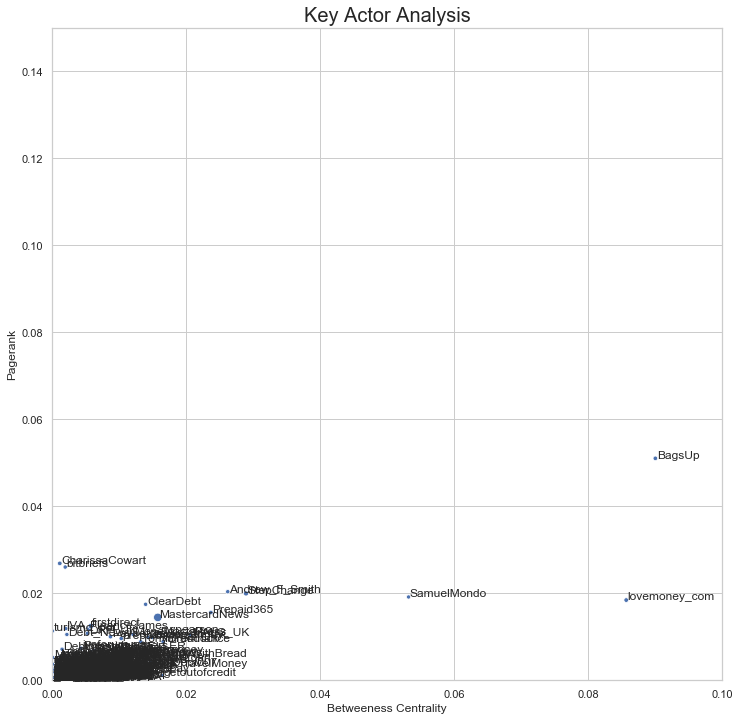

In [61]:
# plot_actor_analysis(data_1)
# plot_actor_analysis(data_2)
plot_actor_analysis(data_3)

# iGraph Analysis

In [7]:
# Networks
import igraph as ig
import louvain
import numpy as np

In [4]:
G1 = ig.Graph.Read_GML(data_path_1)

In [5]:
G1.reciprocity()

0.2880394700033061

In [9]:
G1.assortativity_nominal(ig.VertexClustering.FromAttribute(G1, 'followers').membership)

-0.0007341863237415486

In [21]:
from collections import Counter

def entropy(lst):
    freq = Counter(lst);
    prob = [float(f)/len(lst) for f in freq.values()]
    return -sum(prob*np.log(prob))

entropy_node = [entropy(G1.vs[G1.neighbors(v)]['followers']) for v in G1.vs];

plt.plot(G1.vs['clustering'], entropy_node, '.')
plt.xlabel('Clustering')
plt.ylabel('Entropy')

KeyError: 'Attribute does not exist'